# Error analysis in machine learning projects

lets import downsccaled version of mnist dataset

In [1]:
from sklearn.datasets import load_digits           # downscaled version of mnist digit
digits = load_digits()

<Figure size 800x1600 with 0 Axes>

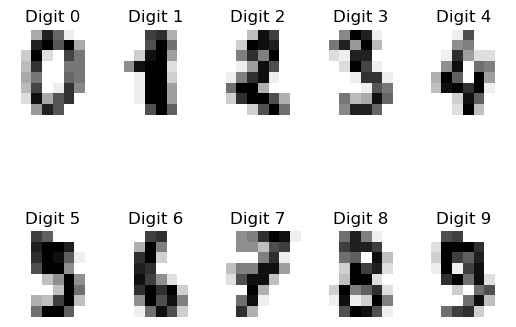

In [2]:
#@ Viz of datasets
from matplotlib import pyplot as plt

plt.figure(figsize = (8,16))
_, axes = plt.subplots(2,5)
images_and_labels = list(zip(digits.images, digits.target))
for ax, (image, label) in zip(axes.flatten(), images_and_labels[:10]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f"Digit {label}")

In [3]:
# separating data into training and dev set 
from sklearn.model_selection import train_test_split

#split data into train and test subsets
n_samples = len(digits.images)
data = digits.images.reshape(n_samples, -1)
X_train, x_dev, y_train, y_dev = train_test_split(
data, digits.target, test_size=0.5, shuffle=False)

In [14]:
# traing a softmax classifier 
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(max_iter = 10000)

# Training the model
classifier.fit(X_train,y_train)

# predicting on dev set
predict = classifier.predict(x_dev)

In [15]:
(predict == y_dev).mean() # checking accuracy 

0.932146829810901

# Lets get into error analysis 

(array([ 3., 11.,  2., 14.,  7.,  4.,  1.,  4., 10.,  5.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

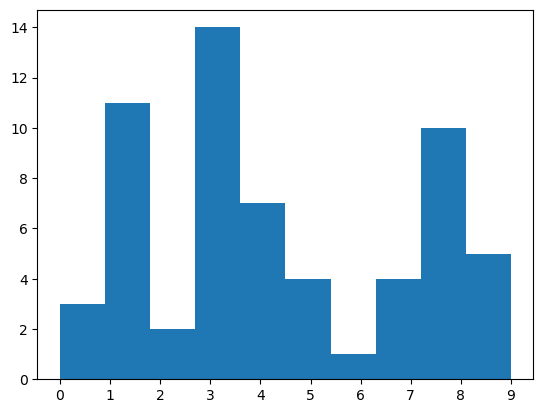

In [19]:
# viz of some misclassification and correct classificaiton

# dev set digits that are misclassified 
X_error = x_dev[predict != y_dev]     
y_error = y_dev[predict != y_dev]     
p_error = predict[predict != y_dev]

# dev set digits that are classified correctlty
X_corr = x_dev[predict == y_dev]
y_corr = y_dev[predict == y_dev]
p_corr = predict[predict == y_dev]

#show the histogram
plt.xticks(range(10))
plt.hist(y_error)

The most misclassified digit is 3  and later 1 and 8.

<Figure size 800x1600 with 0 Axes>

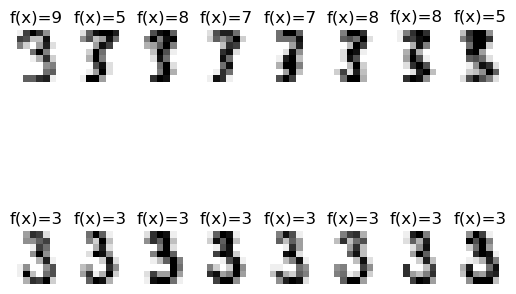

In [26]:
# Lets compare between misclassified 3 and correctly classified 3
plt.figure(figsize=(8,16))

_, axes = plt.subplots(2, 8)
# these images are classified incorrectly
images_and_labels = list(zip(X_error[y_error==3], p_error[y_error==3]))
for ax, (image, label) in zip(axes[0,:], images_and_labels[:8]):
    ax.set_axis_off()
    ax.imshow(image.reshape((8,8)), cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title('f(x)=%i' % label)
    
# these images are classified correctly
images_and_labels = list(zip(X_corr[y_corr==3], p_corr[y_corr==3]))
for ax, (image, label)  in zip(axes[1, :], images_and_labels[:8]):
    ax.set_axis_off()
    ax.imshow(image.reshape((8,8)), cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("f(x)=%i" % label)

Hence we can see why and how 3 is misclassified on work on it to improve our model.